##### 读取以JSON格式保存的txt Web数据

In [2]:
path = 'G:\\python\\pydata-book-2nd-edition\\datasets\\bitly_usagov\\example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

###### 内置模块json及其loads函数逐行加载已经下载好的数据文件，将JSON字符串转换成字典对象

In [3]:
import json
path = 'G:\\python\\pydata-book-2nd-edition\\datasets\\bitly_usagov\\example.txt'
records = [json.loads(line) for line in open(path)]

###### 列表推导式：在一组字符串上执行一条相同操作（如json.loads）的简洁方式。

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [5]:
records[0]['tz']

'America/New_York'

In [7]:
print(records[0]['tz'])

America/New_York


###### 区分以上两种形式，in[5]为对象形式，in[6]为打印形式

#####  对时区进行计数

In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [13]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
        

counts = get_counts(time_zones)
print(counts['America/New_York'])
print(len(time_zones))

1251
3440


In [14]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)
print(counts['America/New_York'])
print(len(time_zones))

1251
3440


In [15]:
from collections import Counter
Counter(time_zones)

Counter({'': 521,
         'Africa/Cairo': 3,
         'Africa/Casablanca': 1,
         'Africa/Ceuta': 2,
         'Africa/Johannesburg': 1,
         'Africa/Lusaka': 1,
         'America/Anchorage': 5,
         'America/Argentina/Buenos_Aires': 1,
         'America/Argentina/Cordoba': 1,
         'America/Argentina/Mendoza': 1,
         'America/Bogota': 3,
         'America/Caracas': 1,
         'America/Chicago': 400,
         'America/Chihuahua': 2,
         'America/Costa_Rica': 1,
         'America/Denver': 191,
         'America/Edmonton': 6,
         'America/Guayaquil': 2,
         'America/Halifax': 4,
         'America/Indianapolis': 20,
         'America/La_Paz': 1,
         'America/Lima': 1,
         'America/Los_Angeles': 382,
         'America/Managua': 3,
         'America/Mazatlan': 1,
         'America/Mexico_City': 15,
         'America/Monterrey': 1,
         'America/Montevideo': 1,
         'America/Montreal': 9,
         'America/New_York': 1251,
         'Amer

###### dict.items()返回一个由所有键值对元组组成的列表

In [16]:
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [18]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

##### 用pandas对时区进行计数

In [4]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [5]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

###### 为记录中的缺失值或者未知值填补一个替代值

缺失值--fillna函数

未知值（空字符串）-- 布尔型数组索引

In [6]:
clean_tz = frame['tz'].fillna('Missing')

In [7]:
clean_tz[clean_tz == ''] = 'Unknown'

In [8]:
tz_counts = clean_tz.value_counts()

In [9]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [10]:
tz_counts[:10].plot(kind = 'barh', rot = 0)

In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### pandas中的三种基本结构：
Series:一维
DataFrame：二维
Panel

In [12]:
s = pd.Series([1, 3, 5,np.nan, 6, 8 ])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


###### NaN(not a number)，在数学表示上表示一个无法表示的数，一般为非浮点数（比如无理数）

###### inf 是一个超过浮点表示范围的浮点数，仍是一个数但可能因无穷大而无法显示

空值在python中的四种表现：
None
False
""
NaN
前三种可以直接用"="来判断


######  DataFrame

In [66]:
dates = pd.date_range('20130101', periods = 6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [67]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.943845,1.133166,1.121944,-0.075833
2013-01-02,0.662845,0.139857,0.440685,-1.017765
2013-01-03,3.011306,2.275615,-0.201939,1.252543
2013-01-04,0.440114,0.189615,1.243685,0.290475
2013-01-05,-0.110811,-1.358570,-1.699000,-1.547818
2013-01-06,-1.448025,-1.245738,0.916090,0.517864


In [15]:
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

##### 查看数据

head/tail分别查看最前面几行和最后面几行（默认为5）

In [18]:
df.head()

,A,B,C,D
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-05,0.291174,0.101058,-1.057906,-0.463199


In [19]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-06,0.680996,0.453097,-0.068356,-0.904589


###### 查看下标：index

In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

###### 查看列标：columns

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

######  查看数据值： values

In [22]:
df.values

array([[-1.1843043 ,  0.35533154, -1.28579974,  0.07229007],
       [-0.52031977,  1.6674272 , -0.27336052, -0.72153087],
       [ 0.74276395, -1.57502636, -0.30351677, -1.25106425],
       [-0.29970884, -0.54211157,  1.2802061 ,  0.30076849],
       [ 0.29117351,  0.10105754, -1.05790573, -0.46319898],
       [ 0.68099623,  0.45309669, -0.06835555, -0.90458904]])

######  描述统计

In [23]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.048233,0.076629,-0.284789,-0.494554
std,0.754906,1.082723,0.905126,0.591065
min,-1.184304,-1.575026,-1.285800,-1.251064
25%,-0.465167,-0.381319,-0.869308,-0.858824
50%,-0.004268,0.228195,-0.288439,-0.592365
75%,0.583541,0.428655,-0.119607,-0.061582
max,0.742764,1.667427,1.280206,0.300768


######  转置

In [24]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.184304,-0.520320,0.742764,-0.299709,0.291174,0.680996
B,0.355332,1.667427,-1.575026,-0.542112,0.101058,0.453097
C,-1.285800,-0.273361,-0.303517,1.280206,-1.057906,-0.068356
D,0.072290,-0.721531,-1.251064,0.300768,-0.463199,-0.904589


##### 排序
sort_index(axis = 0, ascending = True) axis = 0表示按第0维进行排序

In [26]:
df.sort_index(ascending = False)

,A,B,C,D
2013-01-06,0.680996,0.453097,-0.068356,-0.904589
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-01,-1.184304,0.355332,-1.285800,0.072290


In [27]:
df.sort_index(axis = 1,ascending = False)

,D,C,B,A
2013-01-01,0.072290,-1.285800,0.355332,-1.184304
2013-01-02,-0.721531,-0.273361,1.667427,-0.520320
2013-01-03,-1.251064,-0.303517,-1.575026,0.742764
2013-01-04,0.300768,1.280206,-0.542112,-0.299709
2013-01-05,-0.463199,-1.057906,0.101058,0.291174
2013-01-06,-0.904589,-0.068356,0.453097,0.680996


In [28]:
df.sort_index(axis = 1,ascending = False)

,D,C,B,A
2013-01-01,0.072290,-1.285800,0.355332,-1.184304
2013-01-02,-0.721531,-0.273361,1.667427,-0.520320
2013-01-03,-1.251064,-0.303517,-1.575026,0.742764
2013-01-04,0.300768,1.280206,-0.542112,-0.299709
2013-01-05,-0.463199,-1.057906,0.101058,0.291174
2013-01-06,-0.904589,-0.068356,0.453097,0.680996


In [29]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-06,0.680996,0.453097,-0.068356,-0.904589
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531


##### 索引
DataFrame支持Python/Numpy索引语法
推荐使用：.at, .iat, .loc, .iloc, .ix

###### 读取数据

In [30]:
df["A"]

2013-01-01   -1.184304
2013-01-02   -0.520320
2013-01-03    0.742764
2013-01-04   -0.299709
2013-01-05    0.291174
2013-01-06    0.680996
Freq: D, Name: A, dtype: float64

In [31]:
df.A

2013-01-01   -1.184304
2013-01-02   -0.520320
2013-01-03    0.742764
2013-01-04   -0.299709
2013-01-05    0.291174
2013-01-06    0.680996
Freq: D, Name: A, dtype: float64

In [32]:
df[0:3]

,A,B,C,D
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064


In [33]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064


In [34]:
df.loc[dates[0]]

A   -1.184304
B    0.355332
C   -1.285800
D    0.072290
Name: 2013-01-01 00:00:00, dtype: float64

In [35]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.184304,0.355332
2013-01-02,-0.520320,1.667427
2013-01-03,0.742764,-1.575026
2013-01-04,-0.299709,-0.542112
2013-01-05,0.291174,0.101058
2013-01-06,0.680996,0.453097


In [37]:
df.loc['20130102':'20130104',['A','D']]

,A,D
2013-01-02,-0.520320,-0.721531
2013-01-03,0.742764,-1.251064
2013-01-04,-0.299709,0.300768


In [39]:
df.loc['20130102',['A','B']]

A   -0.520320
B    1.667427
Name: 2013-01-02 00:00:00, dtype: float64

In [40]:
df.loc[dates[0],'B']

0.35533153667121592

In [41]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

print(df.at[dates[0],'B'])

100 loops, best of 3: 922 µs per loop
100 loops, best of 3: 77.9 µs per loop
0.355331536671


In [42]:
df.iloc[3]

A   -0.299709
B   -0.542112
C    1.280206
D    0.300768
Name: 2013-01-04 00:00:00, dtype: float64

In [43]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.299709,-0.542112
2013-01-05,0.291174,0.101058


In [44]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.520320,-0.273361
2013-01-03,0.742764,-0.303517
2013-01-05,0.291174,-1.057906


In [45]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064


In [46]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.355332,-1.285800
2013-01-02,1.667427,-0.273361
2013-01-03,-1.575026,-0.303517
2013-01-04,-0.542112,1.280206
2013-01-05,0.101058,-1.057906
2013-01-06,0.453097,-0.068356


######  标量值：

In [47]:
df.iloc[1,1]

1.6674272043933436

In [48]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

100 loops, best of 3: 797 µs per loop
100 loops, best of 3: 37.2 µs per loop


1.6674272043933436

In [49]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-06,0.680996,0.453097,-0.068356,-0.904589


In [50]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.355332,NaN,0.072290
2013-01-02,NaN,1.667427,NaN,NaN
2013-01-03,0.742764,NaN,NaN,NaN
2013-01-04,NaN,NaN,1.280206,0.300768
2013-01-05,0.291174,0.101058,NaN,NaN
2013-01-06,0.680996,0.453097,NaN,NaN


######   使用isin方法做filter过滤

In [51]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,-1.184304,0.355332,-1.285800,0.072290,one
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,one
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,two
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,three
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,four
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,three


In [52]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,two
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,four


In [54]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102',periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [55]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-1.184304,0.355332,-1.285800,0.072290,NaN
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,1.0
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,2.0
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,3.0
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,4.0
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,5.0


###### 使用at 或者iat 修改单个值

In [56]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.355332,-1.285800,0.072290,NaN
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,1.0
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,2.0
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,3.0
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,4.0
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,5.0


In [57]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,0.072290,NaN
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,1.0
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,2.0
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,3.0
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,4.0
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,5.0


######  设定一整列：

In [58]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,5,NaN
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0
2013-01-05,0.291174,0.101058,-1.057906,5,4.0
2013-01-06,0.680996,0.453097,-0.068356,5,5.0


In [59]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,5,NaN
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0
2013-01-05,0.291174,0.101058,-1.057906,5,4.0
2013-01-06,0.680996,0.453097,-0.068356,5,5.0


In [60]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,-5,NaN
2013-01-02,-0.520320,-1.667427,-0.273361,-5,-1.0
2013-01-03,-0.742764,-1.575026,-0.303517,-5,-2.0
2013-01-04,-0.299709,-0.542112,-1.280206,-5,-3.0
2013-01-05,-0.291174,-0.101058,-1.057906,-5,-4.0
2013-01-06,-0.680996,-0.453097,-0.068356,-5,-5.0


##### 缺失数据

In [62]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.285800,5,NaN,1.0
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0,NaN
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0,NaN


###### 丢失所有缺失数据的行得到新的数据

In [63]:
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,-0.52032,1.667427,-0.273361,5,1.0,1.0


###### 填充缺失数据

In [65]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.285800,5,5.0,1.0
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0,5.0
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0,5.0


######  检查缺失数据的位置

In [68]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [69]:
df.mean()#每列的均值

A    0.268597
B    0.188991
C    0.303578
D   -0.096756
dtype: float64

In [70]:
df.mean(1)#每行的均值

2013-01-01    0.308858
2013-01-02    0.056405
2013-01-03    1.584381
2013-01-04    0.540972
2013-01-05   -1.179050
2013-01-06   -0.314952
Freq: D, dtype: float64

###### 多个对象之间的操作，如果维度不对，pandas 会自动调用 broadcasting 机制： shift()用来做对齐操作

In [96]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(3)
print(s)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    NaN
2013-01-04    1.0
2013-01-05    3.0
2013-01-06    5.0
Freq: D, dtype: float64


In [72]:
len(s)

6

In [97]:
s2 = pd.Series([1,3,5,6,8,np.nan], index = dates).shift(0)
print(s2)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    6.0
2013-01-05    8.0
2013-01-06    NaN
Freq: D, dtype: float64


###### 相减 :df - s

In [75]:
df.sub(s, axis = 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,2.011306,1.275615,-1.201939,0.252543
2013-01-04,-2.559886,-2.810385,-1.756315,-2.709525
2013-01-05,-5.110811,-6.358570,-6.699000,-6.547818
2013-01-06,NaN,NaN,NaN,NaN


##### apply操作

######  numpy.cumsum(a, axis=None, dtype=None, out=None)
axis=0，按照行累加。
axis=1，按照列累加。
axis不给定具体值，就把numpy数组当成一个一维数组。


In [76]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.943845,1.133166,1.121944,-0.075833
2013-01-02,-0.281000,1.273023,1.562629,-1.093598
2013-01-03,2.730306,3.548638,1.360690,0.158944
2013-01-04,3.170421,3.738253,2.604375,0.449419
2013-01-05,3.059610,2.379683,0.905375,-1.098399
2013-01-06,1.611585,1.133945,1.821465,-0.580535


###### 求每列最大值最小值之差

In [77]:
df.apply(lambda x: x.max() - x.min())

A    4.459331
B    3.634185
C    2.942684
D    2.800361
dtype: float64

##### 绘制直方图

In [79]:
s = pd.Series(np.random.randint(0, 7, size = 10))
print(s)

0    5
1    2
2    6
3    0
4    5
5    4
6    2
7    5
8    6
9    1
dtype: int32


In [80]:
print(s.value_counts())

5    3
6    2
2    2
4    1
1    1
0    1
dtype: int64


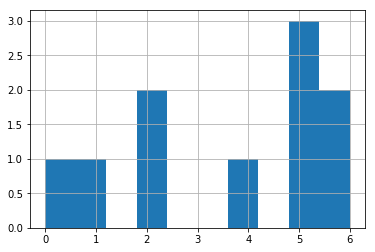

In [81]:
h = s.hist()

##### 字符串方法

当 Series 或者 DataFrame 的某一列是字符串时，我们可以用 .str 对这个字符串数组进行字符串的基本操作

Series.str.lower() 全部小写
Series.str.capitalize() 首字母大写
Series.str.upper() 全部大写
Series.str.swapcase() 大小写反转

In [82]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


##### 合并

######  连接

In [83]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.094013,-0.107319,-0.361465,1.031313
1,0.654741,0.504514,-0.898981,-1.052048
2,-0.973405,-0.235625,0.992452,0.069436
3,-0.839987,0.627787,-1.087574,-0.866771
4,-0.366811,-0.535748,0.279995,0.749724
5,0.029577,-1.027112,-0.299220,-1.516014
6,0.574276,-1.983542,0.523656,0.048897
7,0.304904,-1.279796,1.138827,-1.357893
8,-0.816148,-0.104566,1.070541,0.730847
9,-1.109339,1.036658,-1.531314,0.885323


###### pd.comcat函数可以将多个pandas对象连接

In [84]:
pieces = [df[:2], df[4:5], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.094013,-0.107319,-0.361465,1.031313
1,0.654741,0.504514,-0.898981,-1.052048
4,-0.366811,-0.535748,0.279995,0.749724
7,0.304904,-1.279796,1.138827,-1.357893
8,-0.816148,-0.104566,1.070541,0.730847
9,-1.109339,1.036658,-1.531314,0.885323


###### 数据库中的Join

In [85]:
left = pd.DataFrame({'key':['foo','foo'], 'lval':[1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [86]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


##### 向DataFrame中添加行

In [87]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.723825,-0.202786,-1.434748,0.265517
1,1.094460,1.904421,-1.319065,0.457149
2,0.285969,-0.326457,0.686463,0.260310
3,0.884666,-0.154627,0.066399,-1.051722
4,-0.391009,0.430295,-0.598148,-0.318650
5,-0.548567,-1.051670,0.548979,1.604929
6,-1.177080,0.158593,-0.051388,-0.378732
7,-0.746116,-0.491124,-2.097833,0.187677


###### 将第三行的值添加到最后一行

In [88]:
s = df.iloc[3]
df.append(s, ignore_index = True)

,A,B,C,D
0,0.723825,-0.202786,-1.434748,0.265517
1,1.094460,1.904421,-1.319065,0.457149
2,0.285969,-0.326457,0.686463,0.260310
3,0.884666,-0.154627,0.066399,-1.051722
4,-0.391009,0.430295,-0.598148,-0.318650
5,-0.548567,-1.051670,0.548979,1.604929
6,-1.177080,0.158593,-0.051388,-0.378732
7,-0.746116,-0.491124,-2.097833,0.187677
8,0.884666,-0.154627,0.066399,-1.051722


#####  Grouping

In [89]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                  'B' : ['one', 'one', 'two', 'three',
                        'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.535393,0.888949
1,bar,one,0.720875,0.828445
2,foo,two,0.861301,1.205393
3,bar,three,0.550742,1.335287
4,foo,two,1.780808,-0.891596
5,bar,two,-0.519805,1.937040
6,foo,one,1.179958,1.261979
7,foo,three,-1.431584,-0.574595


###### 按A列分类并求和,按A,B两列分类并求和

In [90]:
df.groupby('A').sum()

,C,D
A,,
bar,0.751812,4.100771
foo,2.925876,1.890130


In [91]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.720875  0.828445
    three  0.550742  1.335287
    two   -0.519805  1.937040
foo one    1.715351  2.150928
    three -1.431584 -0.574595
    two    2.642109  0.313797

##### 改变形状

###### Stack

###### zio()函数的用法
在python 3.0中zip()是可迭代对象，使用时必须将其包含在一个list中，方便一次性显示出所有结果

1、将0个，1个或多个列表对应位置的元素组成新的元组，这些新元组构成一个新列表

In [99]:
#1、
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
xyz = zip(x, y, z)
print(list(xyz))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


In [100]:
#无参数
x = zip()
print(list(x))

[]


In [102]:
#长度不等取长度最小的
x =[1, 2, 3]
y = ['a', 'b', 'c', 'd']
xy = zip(x, y)
print(list(xy))

[(1, 'a'), (2, 'b'), (3, 'c')]


######  
2、可变参数的传递，也可以用于矩阵的转置

In [103]:
#2、
x = [[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]]
y = zip(*x)
print(list(y))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


###### 
3、字典的构造

In [104]:
#3、
x = ['a', 'b', 'c']
y = ['x', 'y', 'z']
z = zip(x, y)
d = dict(z)
print(d)

{'a': 'x', 'b': 'y', 'c': 'z'}


###### 
4、与iter合用：

In [105]:
a = [1, 2, 3, 4, 5, 6]
b = zip(*([iter(a)] * 2))
print(list(b))

[(1, 2), (3, 4), (5, 6)]


In [106]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print(list(tuples))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


A         B
first second                    
bar   one     1.444336 -1.357287
      two    -0.179765 -1.434607
baz   one     0.895398 -0.111451
      two     0.558473 -0.583456
foo   one    -1.251264 -1.234615
      two    -1.405175 -0.131248
qux   one     0.721672  0.524280
      two    -1.449612  0.032893

###### 将columns变成一个新的index部分

In [107]:
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.444336
               B   -1.357287
       two     A   -0.179765
               B   -1.434607
baz    one     A    0.895398
               B   -0.111451
       two     A    0.558473
               B   -0.583456
dtype: float64

###### stack()函数详解

stack(arrays,axis = 0)

1、要求arrays里的每个元素必须形状一样
2、如果参数arrays里面的每个元素是个1维的，那么调用stack()函数后会增加为2维，所以axis只能等于0和1（维度的下标是从0开始的）
3、

In [108]:
import numpy as np
a = [[1, 2, 3],
    [4, 5, 6]]
print(a)

[[1, 2, 3], [4, 5, 6]]


In [109]:
print("增加一维，新维度的下标为0")
c = np.stack(a, axis = 0)
print(c)

增加一维，新维度的下标为0
[[1 2 3]
 [4 5 6]]


In [110]:
print("增加一维，新维度的下标为1")
c = np.stack(a, axis = 1)
print(c)

增加一维，新维度的下标为1
[[1 4]
 [2 5]
 [3 6]]
